<a href="https://colab.research.google.com/github/marcusvbastos/reconhecimento-facial-/blob/main/reconhecimento_facial_do_zero_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install mtcnn opencv-python numpy tensorflow

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 973ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 965ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


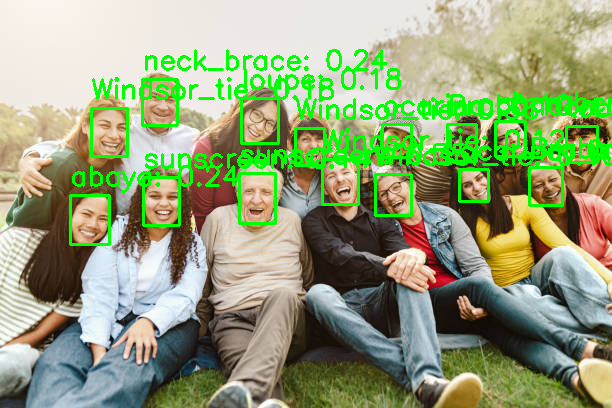

In [8]:
import cv2
import numpy as np
from mtcnn import MTCNN
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array
# Import the necessary function to display images in Colab
from google.colab.patches import cv2_imshow


# Carregar o detector de faces MTCNN
face_detector = MTCNN()

# Carregar o modelo VGG16 pré-treinado para classificação
classification_model = VGG16(weights='imagenet')

# Carregar a imagem de entrada
image_path = '/content/istockphoto-1480574526-612x612.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detectar faces na imagem
faces = face_detector.detect_faces(image_rgb)

# Para cada face detectada
for face in faces:
    # Extrair coordenadas da bounding box
    x, y, w, h = face['box']

    # Extrair a região da face
    face_img = image_rgb[y:y+h, x:x+w]

    # Pré-processar a imagem da face para o VGG16
    face_img = cv2.resize(face_img, (224, 224))
    face_img = img_to_array(face_img)
    face_img = np.expand_dims(face_img, axis=0)
    face_img = preprocess_input(face_img)

    # Fazer a classificação
    predictions = classification_model.predict(face_img)
    label = decode_predictions(predictions, top=1)[0][0]

    # Desenhar a bounding box e o rótulo na imagem
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(image, f"{label[1]}: {label[2]:.2f}", (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Mostrar a imagem com as detecções using cv2_imshow() instead of cv2.imshow()
cv2_imshow(image) # Changed to cv2_imshow()
#cv2.waitKey(0) # No need for waitKey() and destroyAllWindows() in Colab
#cv2.destroyAllWindows()